In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

#### 1. 读取图片

In [3]:
image_raw_data = tf.gfile.FastGFile("../datasets/cat.jpg",'rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵。
    print(img_data.eval())
    img_data.set_shape([1797, 2673, 3])
    print(img_data.get_shape())

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ..., 
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ..., 
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ..., 
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ..., 
 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ..., 
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ..., 
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ..., 
  [108  86  49]
  [105  82  48]
  [104  81  49]]]
(1797, 2673, 3)


#### 2. 打印图片

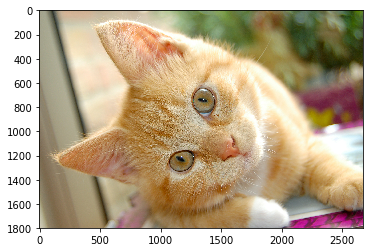

In [4]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

#### 3. 重新调整图片大小

Digital type:  <dtype: 'float32'>


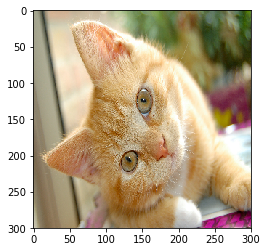

In [7]:
with tf.Session() as sess:    
    resized = tf.image.resize_images(img_data, [300, 300], method=0)
    
    # TensorFlow的函数处理图片后存储的数据是float32格式的，需要转换成uint8才能正确打印图片。
    print("Digital type: ", resized.dtype)
    cat = np.asarray(resized.eval(), dtype='uint8')
    # tf.image.convert_image_dtype(rgb_image, tf.float32)
    plt.imshow(cat)
    plt.show()

#### 4. 裁剪和填充图片

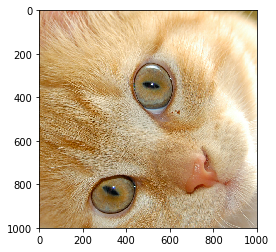

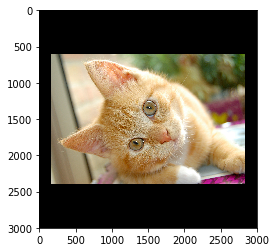

In [8]:
with tf.Session() as sess:    
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

#### 5. 截取中间50%的图片

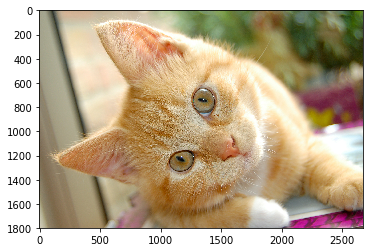

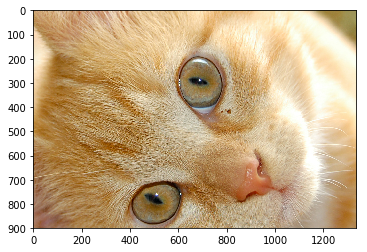

In [10]:
with tf.Session() as sess:   
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(img_data.eval())
    plt.show()
    plt.imshow(central_cropped.eval())
    plt.show()

#### 6. 翻转图片

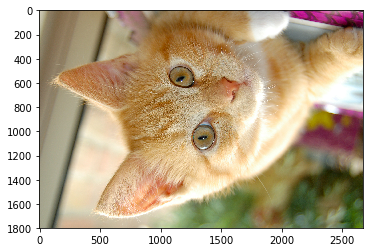

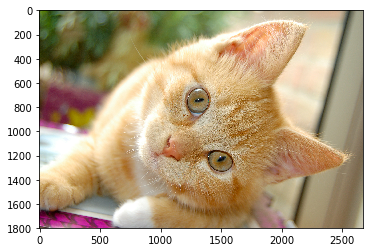

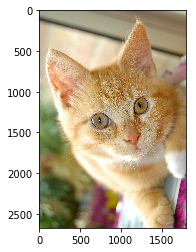

In [12]:
with tf.Session() as sess: 
    # 上下翻转
    flipped1 = tf.image.flip_up_down(img_data)
    plt.imshow(flipped1.eval())
    plt.show()
    # 左右翻转
    flipped2 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped2.eval())
    plt.show()
    
    #对角线翻转
    transposed = tf.image.transpose_image(img_data)

    plt.imshow(transposed.eval())
    plt.show()
    
    # 以一定概率上下翻转图片。
    #flipped = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转图片。
    #flipped = tf.image.random_flip_left_right(img_data)

#### 7. 图片色彩调整

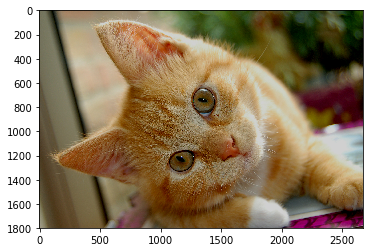

In [13]:
with tf.Session() as sess:     
    # 将图片的亮度-0.5。
    #adjusted = tf.image.adjust_brightness(img_data, -0.5)
    
    # 将图片的亮度-0.5
    #adjusted = tf.image.adjust_brightness(img_data, 0.5)
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    adjusted = tf.image.random_brightness(img_data, max_delta=0.5)
    
    # 将图片的对比度-5
    #adjusted = tf.image.adjust_contrast(img_data, -5)
    
    # 将图片的对比度+5
    #adjusted = tf.image.adjust_contrast(img_data, 5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
    #adjusted = tf.image.random_contrast(img_data, lower, upper)

    plt.imshow(adjusted.eval())
    plt.show()

#### 8. 添加色相和饱和度

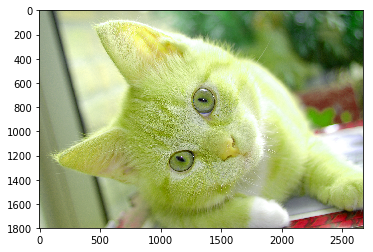

In [14]:
with tf.Session() as sess:         
    adjusted = tf.image.adjust_hue(img_data, 0.1)
    #adjusted = tf.image.adjust_hue(img_data, 0.3)
    #adjusted = tf.image.adjust_hue(img_data, 0.6)
    #adjusted = tf.image.adjust_hue(img_data, 0.9)
    
    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
    #adjusted = tf.image.random_hue(image, max_delta)
    
    # 将图片的饱和度-5。
    #adjusted = tf.image.adjust_saturation(img_data, -5)
    # 将图片的饱和度+5。
    #adjusted = tf.image.adjust_saturation(img_data, 5)
    # 在[lower, upper]的范围随机调整图的饱和度。
    #adjusted = tf.image.random_saturation(img_data, lower, upper)
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    #adjusted = tf.image.per_image_whitening(img_data)
    
    plt.imshow(adjusted.eval())
    plt.show()

#### 9. 添加标注框并裁减。

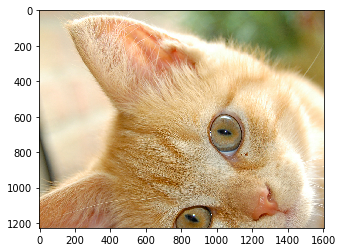

In [18]:
with tf.Session() as sess:         

    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])

    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(img_data), bounding_boxes=boxes)


    batched = tf.expand_dims(tf.image.convert_image_dtype(img_data, tf.float32), 0) 
    image_with_box = tf.image.draw_bounding_boxes(batched, bbox_for_draw)
    
    distorted_image = tf.slice(img_data, begin, size)
    plt.imshow(distorted_image.eval())
    plt.show()